# **ESTE CÓDIGO SE CORRIÓ EN EL DOCKER**

## XS: Cross Sections

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

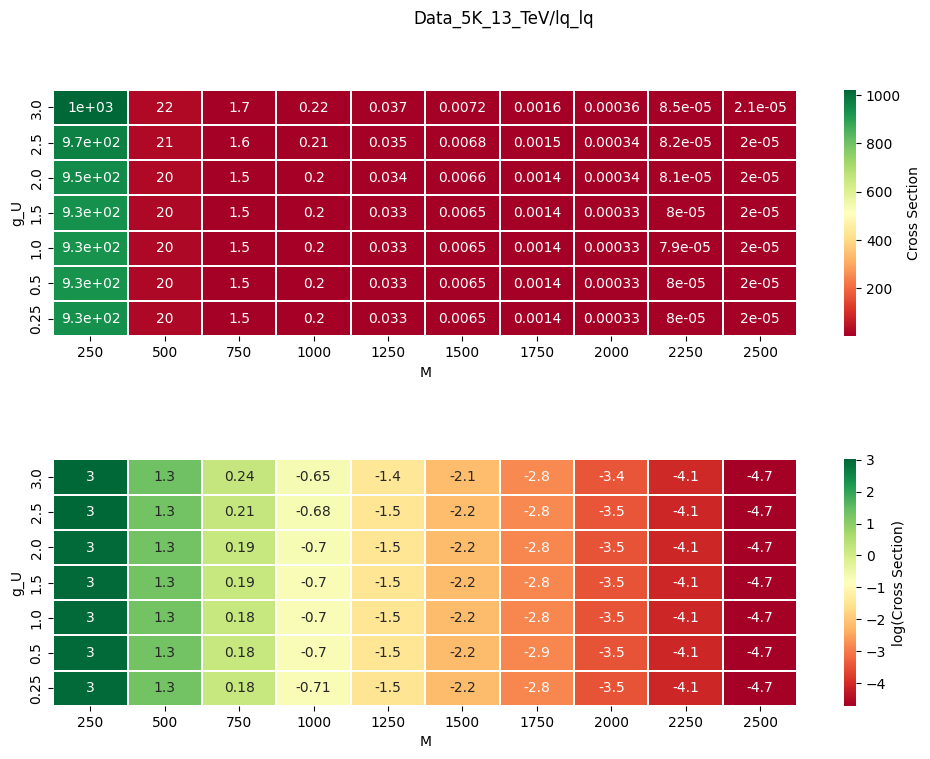

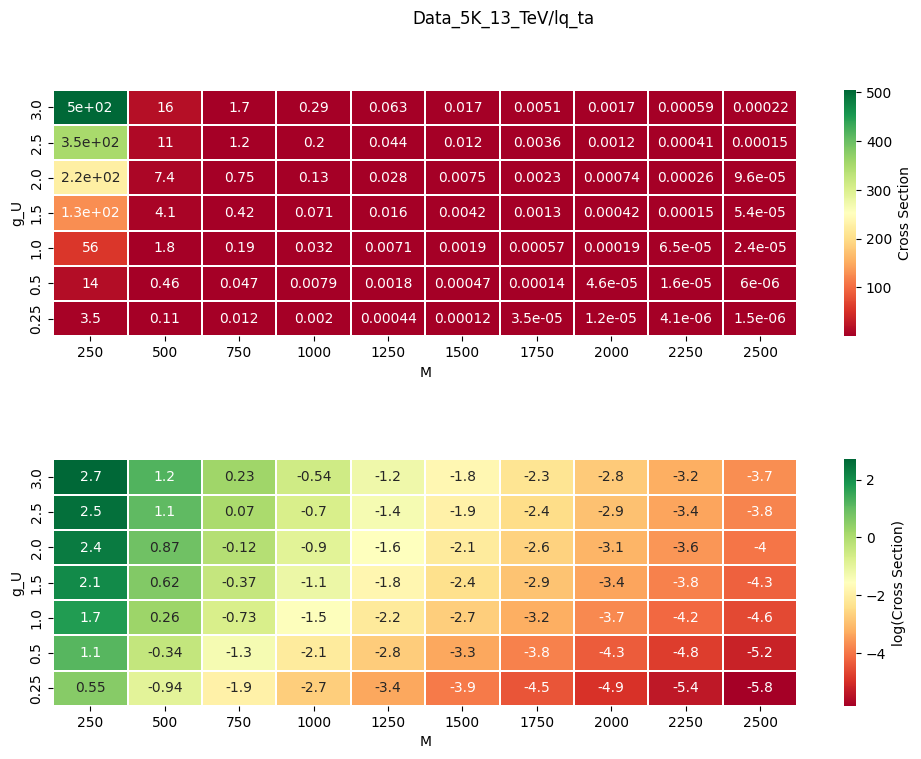

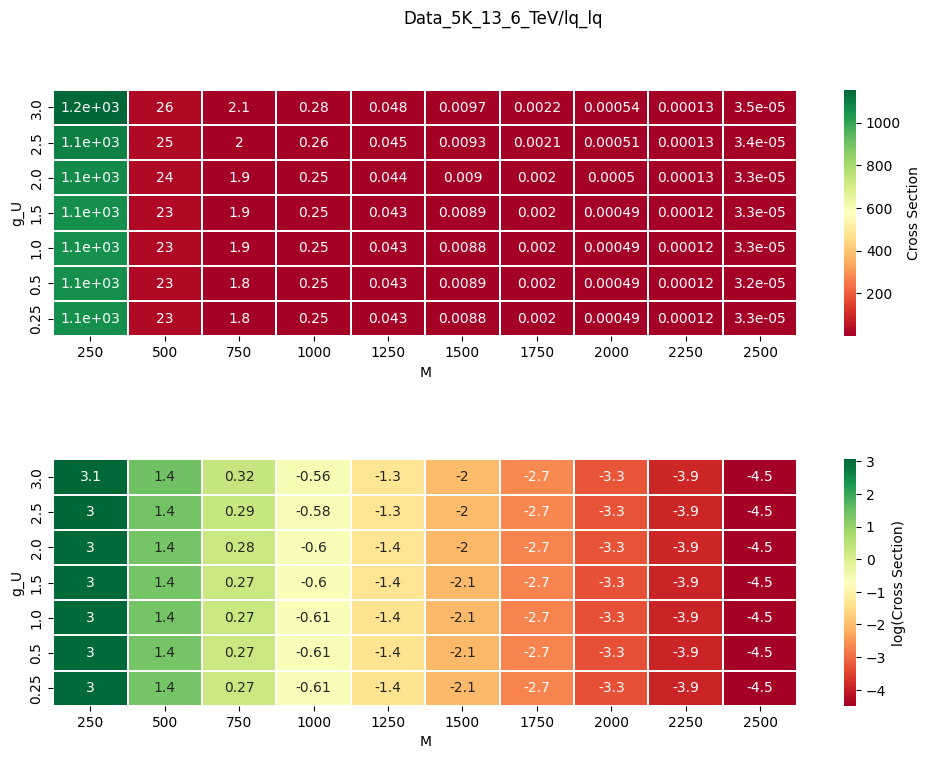

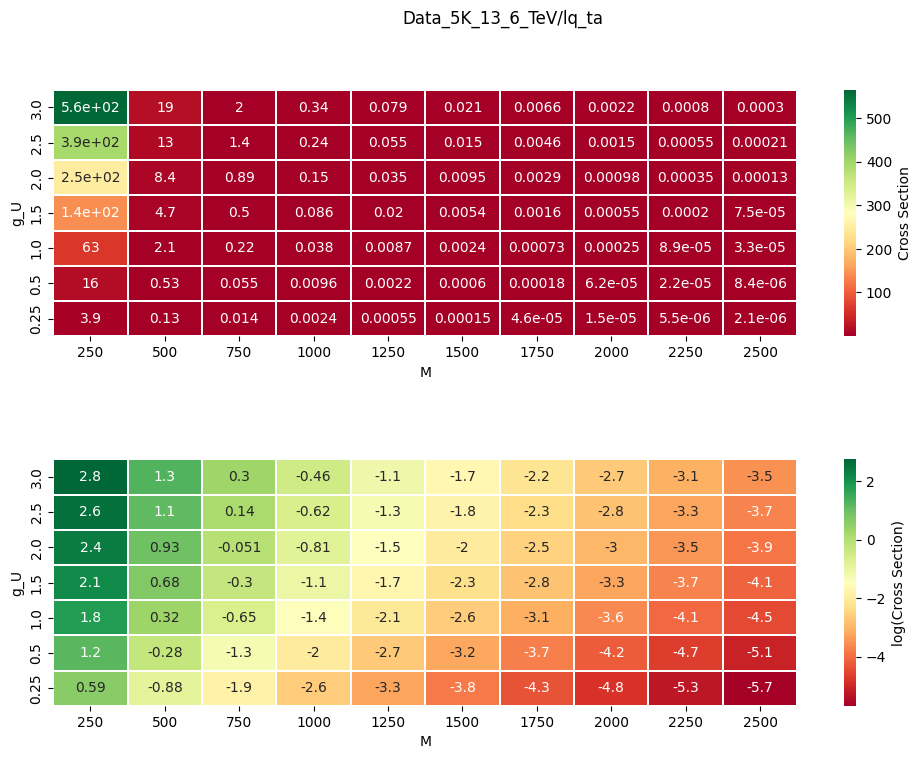

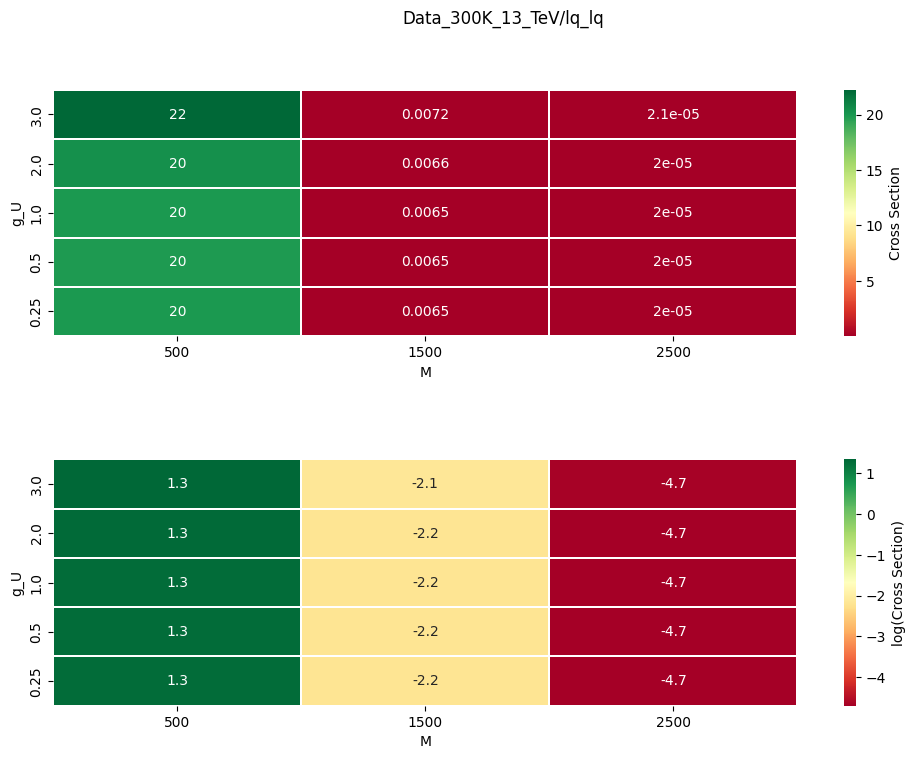

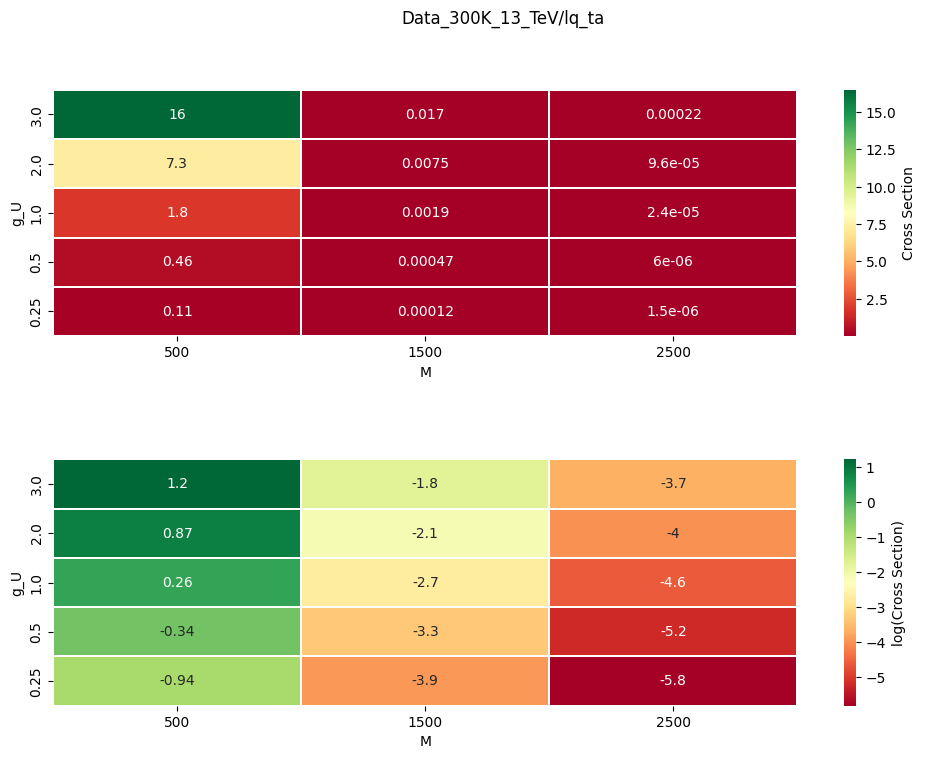

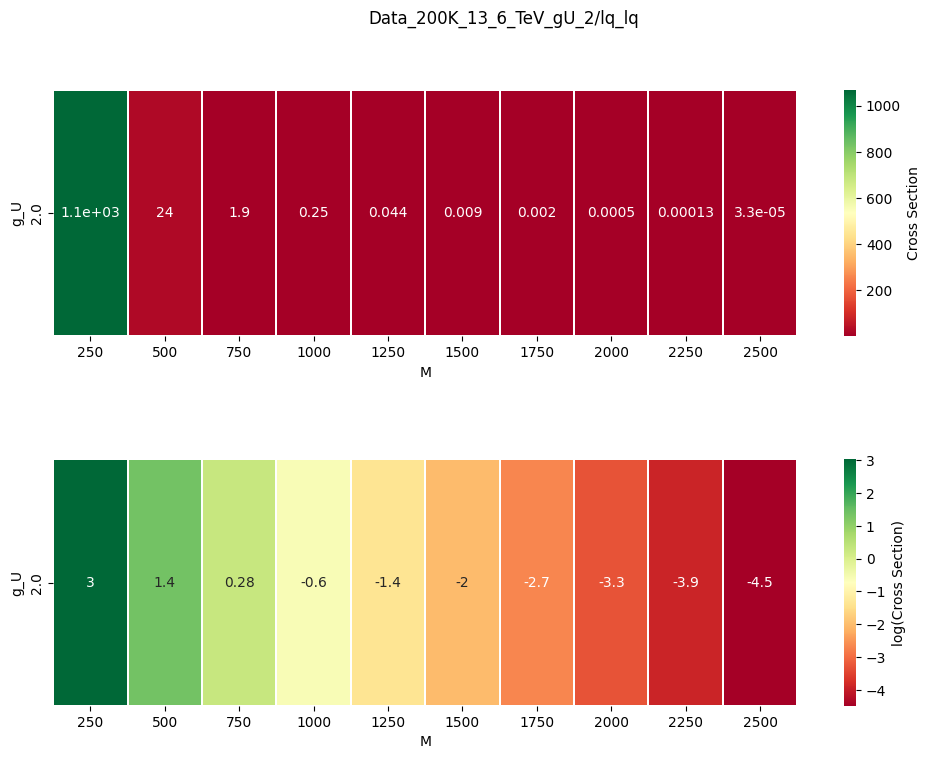

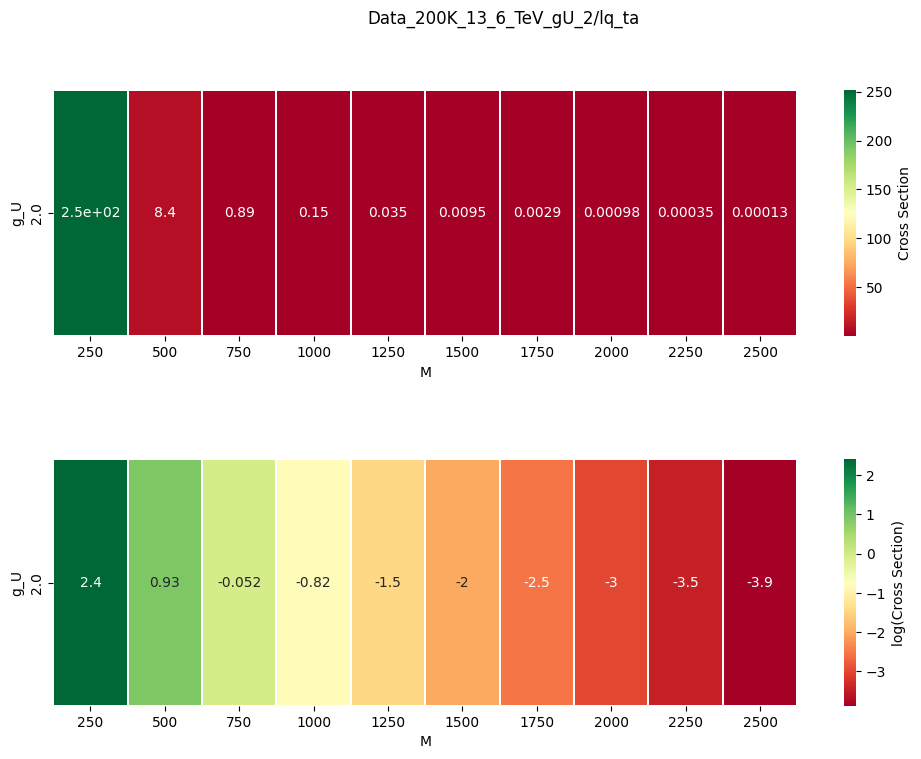

In [2]:
personal_folder = "/disco4/personal_folders/Joaquin/"
rutas_data = ["Data_5K_13_TeV","Data_5K_13_6_TeV", "Data_300K_13_TeV", "Data_200K_13_6_TeV_gU_2"]
processes = ["lq_lq", "lq_ta"]

Datasets = {}
for ruta_data in rutas_data:
    for process in processes:
        DataFrame = pd.read_excel(f"{personal_folder}{ruta_data}/{process}/Cross_Sections/XS_Matriz.xlsx", index_col = 0)
        DataFrame.columns = [int(column) for column in DataFrame.columns]
        DataFrame.sort_index(level=0, ascending=False, inplace=True)
        Datasets[f"{ruta_data}/{process}"] = DataFrame
        
        fig, (ax1, ax2) = plt.subplots(2,1)
    
        fig.set_figheight(8)
        fig.set_figwidth(12)
        fig.subplots_adjust(hspace=0.5)
        
        sns.heatmap(DataFrame, cmap ='RdYlGn', linewidths = 0.2, annot = True, cbar_kws={'label': 'Cross Section'}, ax = ax1).set(xlabel='M', ylabel='g_U')
        sns.heatmap(np.log10(DataFrame), cmap ='RdYlGn', linewidths = 0.2, annot = True, cbar_kws={'label': 'log(Cross Section)'}, ax = ax2).set(xlabel='M', ylabel='g_U')

        fig.suptitle(f"{ruta_data}/{process}")

## Data_5K $\rightarrow$  K = XS (13 TeV) / XS (13.6)

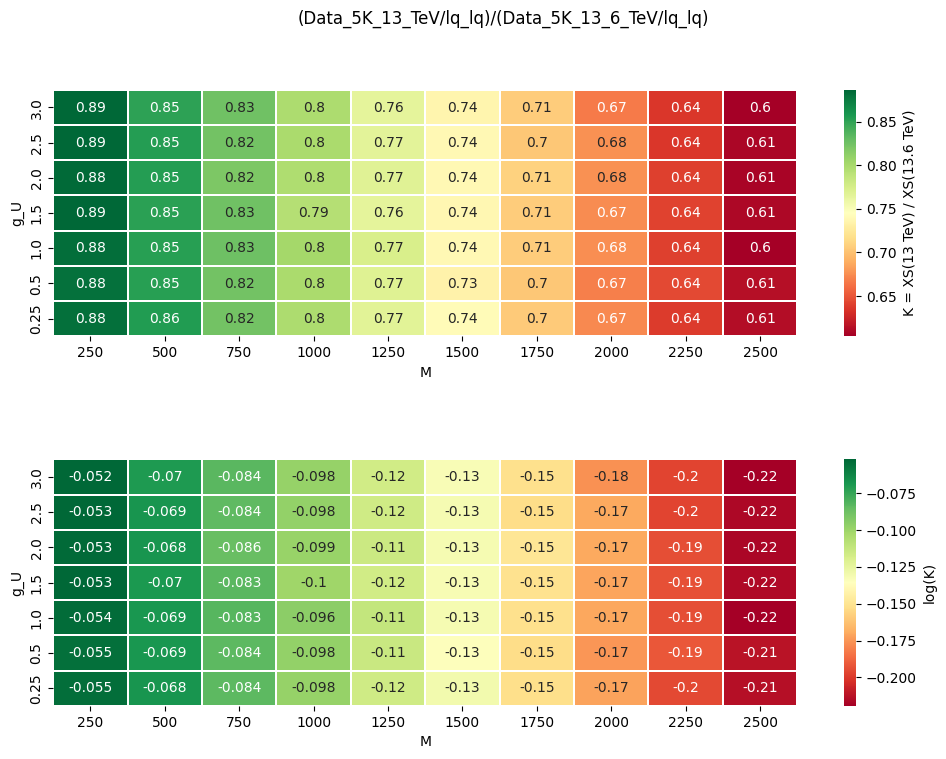

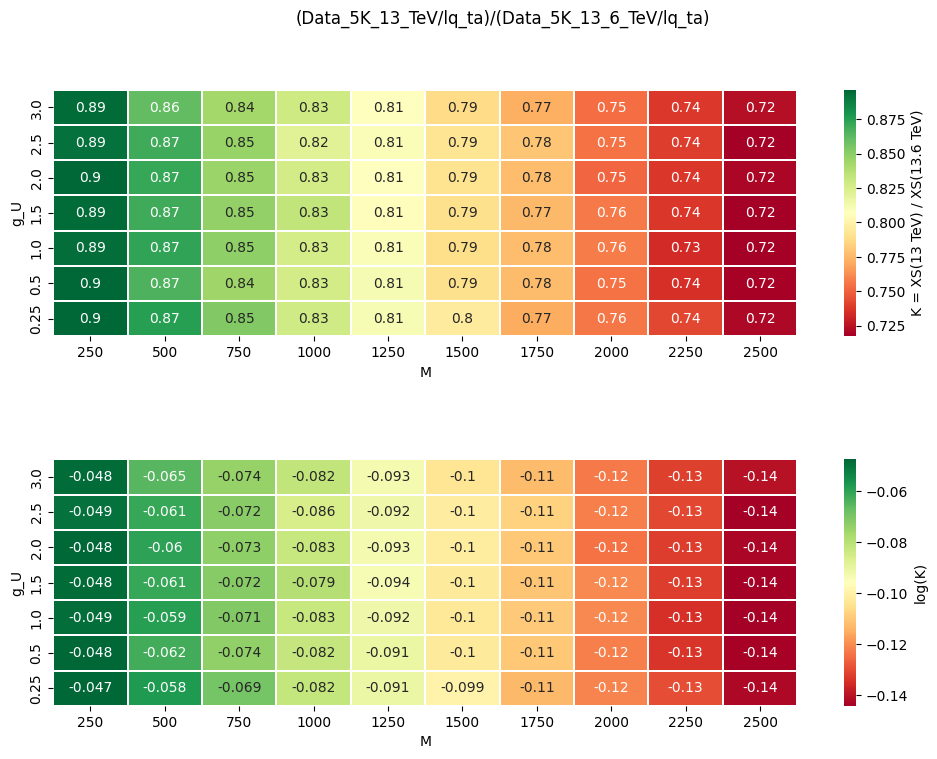

In [3]:
ruta_data_1 = "Data_5K_13_TeV"
ruta_data_2 = "Data_5K_13_6_TeV"

for process in processes:

    DataFrame_1 = Datasets[f"{ruta_data_1}/{process}"]
    DataFrame_2 = Datasets[f"{ruta_data_2}/{process}"]
    DataFrame = DataFrame_1/DataFrame_2
    
    fig, (ax1, ax2) = plt.subplots(2,1)
    
    fig.set_figheight(8)
    fig.set_figwidth(12)
    fig.subplots_adjust(hspace=0.5)
    
    DataFrame.sort_index(level=0, ascending=False, inplace=True)
    
    sns.heatmap(DataFrame, cmap ='RdYlGn', linewidths = 0.2, annot = True, cbar_kws={'label': 'K = XS(13 TeV) / XS(13.6 TeV)'}, ax = ax1).set(xlabel='M', ylabel='g_U')
    sns.heatmap(np.log10(DataFrame), cmap ='RdYlGn', linewidths = 0.2, annot = True, cbar_kws={'label': 'log(K)'}, ax = ax2).set(xlabel='M', ylabel='g_U')

    fig.suptitle(f"({ruta_data_1}/{process})/({ruta_data_2}/{process})")

## SM Backgrounds

In [4]:
ruta_BG = "SM_Backgrounds/XS_Matriz.xlsx"

DataFrame = pd.read_excel(ruta_BG) 

In [5]:
DataFrame

,Unnamed: 0,stop,w_jets,z_jets,ww,wz,zz,ttbar
0,XS (13.6 TeV):,262.100000,153905.700000,46630.700000,69.300000,26.280000,10.170000,559.900000
1,XS (13.0 TeV):,241.170000,146548.300000,43029.270000,65.507360,24.691840,9.562416,504.696000
2,K:,1.086785,1.050205,1.083697,1.057896,1.064319,1.063539,1.109381
